In [1]:
# imports :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense ,Input,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import os 
from tensorflow.keras import models


2024-08-03 16:11:56.319831: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-03 16:11:56.353586: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 16:11:56.591984: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-03 16:11:56.593154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 16:11:57.323973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# load & Divide the data:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print(f"training_images_shape:{np.shape(train_images)}\ntraining_labels_shape:{np.shape(train_labels)}")
print(f"test_images_shape:{np.shape(test_images)}\ntest_labels_shape:{np.shape(test_labels)}")



training_images_shape:(60000, 28, 28)
training_labels_shape:(60000,)
test_images_shape:(10000, 28, 28)
test_labels_shape:(10000,)


In [3]:
#preprocessing the data :

def reshape_and_normalize(images):
    
    # reshape the images to add extra dimensions
    
    images=images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
    
    # Normalize pixel values:

    images=images/255
    return images
    

In [4]:
# callbacks :

class mycallback(tf.keras.callbacks.Callback):

    def one_epoch_end(self,epoch,logs={}):
        if(logs.get("accuracy")>0.9952):
             print("\n stop training:")
             self.model.stop_training=True

In [5]:
#Bulding the model :

model=Sequential([
    Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
      ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

2024-08-03 16:11:58.715186: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-08-03 16:11:58.715205: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: abdalrahman-Dell-G15-5511
2024-08-03 16:11:58.715208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: abdalrahman-Dell-G15-5511
2024-08-03 16:11:58.715268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 470.256.2
2024-08-03 16:11:58.715277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 470.256.2
2024-08-03 16:11:58.715279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 470.256.2


In [6]:
#use optimizer Adam :
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
               )
                   

In [7]:
# Callbacks:
callbacks=mycallback()
# train the model :

print("\n MOdel Training :")

history=model.fit(train_images,train_labels,epochs=5,batch_size=135,callbacks=[callbacks])
history


 MOdel Training :
Epoch 1/5


/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


445/445 [==============================] - 12s 27ms/step - loss: 0.6142 - accuracy: 0.9277
Epoch 2/5
445/445 [==============================] - 11s 24ms/step - loss: 0.0604 - accuracy: 0.9815
Epoch 3/5
445/445 [==============================] - 12s 27ms/step - loss: 0.0411 - accuracy: 0.9873
Epoch 4/5
445/445 [==============================] - 12s 26ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 5/5
445/445 [==============================] - 11s 24ms/step - loss: 0.0265 - accuracy: 0.9916


<Axes: >

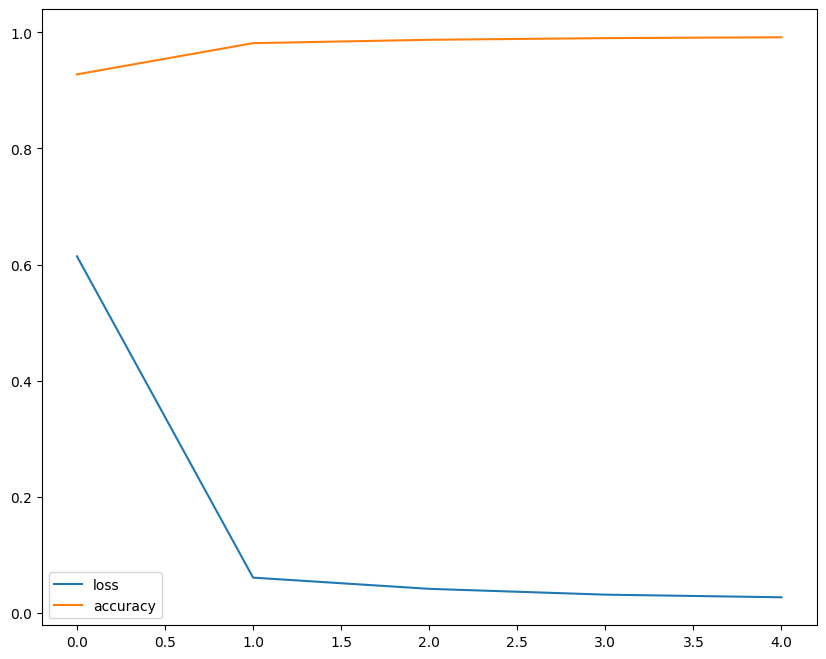

In [8]:
#to plot the model History :
# firs : --->> make dataframe with the model.history , then plot it

df=pd.DataFrame(model.history.history)
df.plot(figsize=(10,8))

In [9]:
# Evalute on the test set:

print("\n Model Evaluation :")
test_loss = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss)


 Model Evaluation :


/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 0s - loss: 0.0507 - accuracy: 0.9858 - 459ms/epoch - 1ms/step
[0.05070044472813606, 0.98580002784729]


In [10]:
# Model prediction :

print("\n Model Prediction :")
y_predict=model.predict(test_images)
y_predict[:10]



 Model Prediction :
313/313 [==============================] - 0s 1ms/step


array([[1.6713819e-06, 9.7217651e-12, 1.5814928e-08, 8.7839595e-07,
        7.3897242e-12, 6.0781991e-10, 3.7757685e-13, 9.9999726e-01,
        7.6166797e-09, 1.8167206e-07],
       [1.7638047e-10, 4.9138773e-09, 1.0000000e+00, 7.0522206e-15,
        7.3627419e-17, 1.8008919e-18, 8.8175262e-10, 1.1727780e-13,
        8.7118604e-13, 3.1407557e-21],
       [2.1666054e-10, 1.0000000e+00, 1.5768481e-10, 3.1547575e-13,
        2.2027637e-08, 5.9442234e-10, 5.3717664e-10, 2.1501448e-08,
        6.7335815e-10, 4.1863440e-11],
       [9.9965441e-01, 7.4547674e-11, 1.4887121e-10, 3.3074915e-10,
        2.2308256e-11, 2.2874009e-09, 3.4544014e-04, 8.3824155e-08,
        7.7259182e-10, 1.8850068e-08],
       [1.8942547e-11, 4.9926054e-09, 1.2888023e-06, 9.8906758e-11,
        9.9998736e-01, 2.6757152e-09, 2.1634241e-09, 1.1207383e-08,
        1.1079892e-05, 1.6370380e-07],
       [7.3670584e-12, 1.0000000e+00, 1.2994102e-13, 2.0220216e-15,
        6.1753819e-10, 1.3635359e-12, 1.9881015e-10, 2.71

In [11]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predict)} \n the max_value for prediction --->>> {np.max(y_predict)} ")

the min_value for prediction --->> 1.261726202967649e-27 
 the max_value for prediction --->>> 1.0 


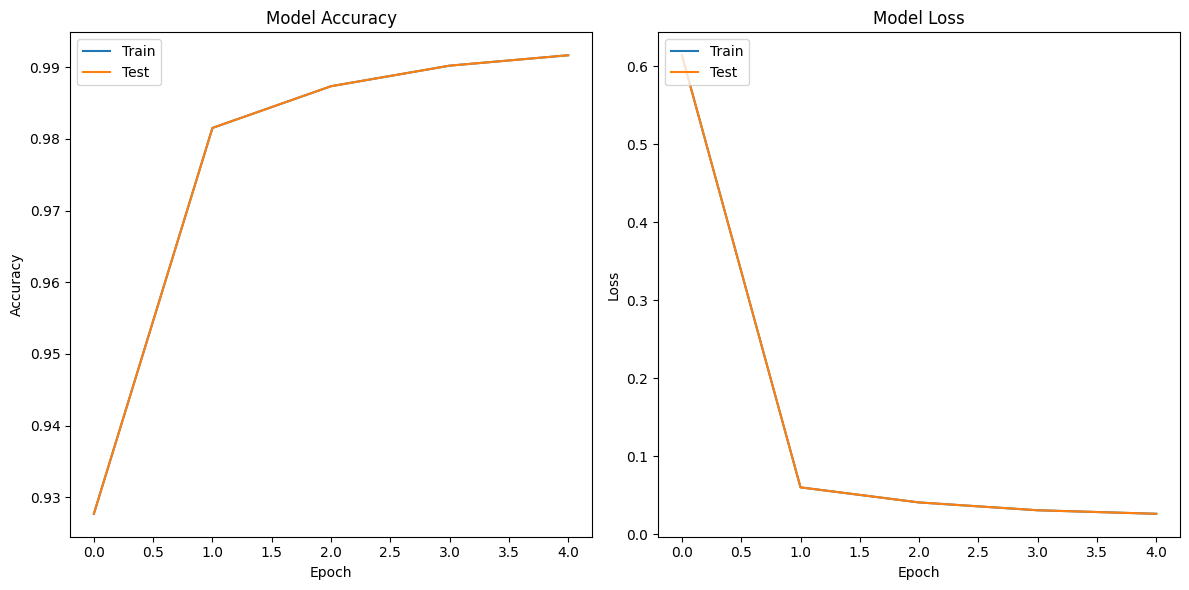

In [12]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step


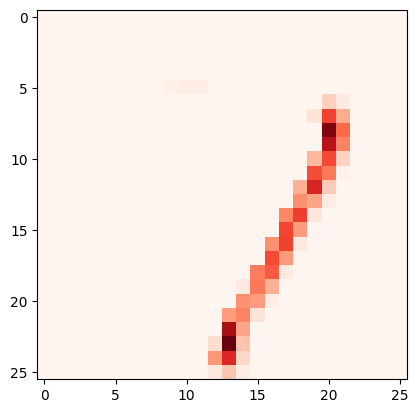

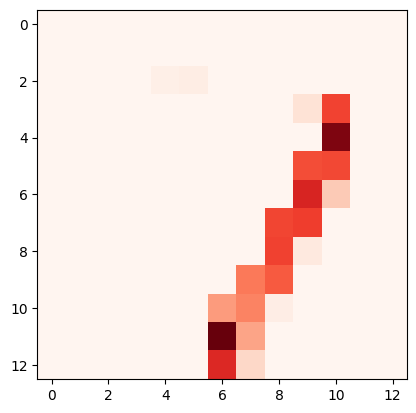

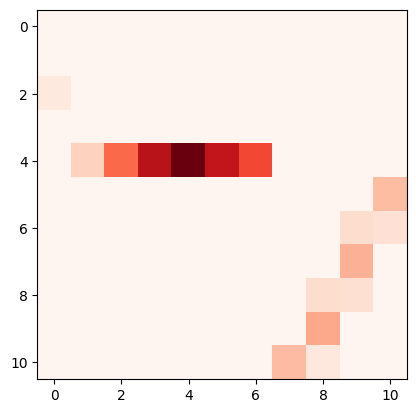

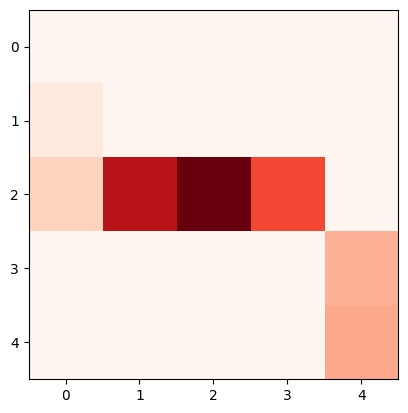

In [13]:
# Assuming `model` is your trained model
layers_output = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layers_output)

# Example usage
img3 = 5
convolution_Number = 1

# Assuming `test_images` is your test data
activations = activation_model.predict(test_images)

for x in range(0, 4):
    # Assuming you want to visualize the activations
    plt.imshow(activations[x][0, :, :, convolution_Number], cmap='Reds')
    plt.show()